<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/Spearman_correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
from itertools import combinations
from itertools import product
from scipy.stats import spearmanr
import seaborn as sns
import scipy
import scipy.cluster.hierarchy as sch


drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [101]:
Zafira_1_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Solvent_100ml_corrected/Sample_63_phthalate_concentration_2023-11-25.csv', header=1) #Blank solvent corrected
Zafira_1_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_64_phthalate_concentration_2024-02-27.csv', header=1) #Blank solvent corrected
Zafira_2_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Solvent_100ml_corrected/Sample_65_phthalate_concentration_2023-11-25.csv', header=1) #Blank solvent corrected
Zafira_2_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_66_phthalate_concentration_2024-02-27.csv', header=1) #Blank solvent corrected
Auto_1_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Solvent_100ml_corrected/Sample_130_phthalate_concentration_2023-11-25.csv', header=1) #Blank solvent corrected
Auto_1_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_123_phthalate_concentration_2024-02-27.csv', header=1) #Blank solvent corrected
Auto_2_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Solvent_100ml_corrected/Sample_144_phthalate_concentration_2023-11-25.csv', header=1) #Blank solvent corrected
Auto_2_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_140_phthalate_concentration_2024-02-27.csv', header=1) #Blank solvent corrected
Auto_3_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_155_phthalate_concentration_2023-11-26.csv', header=1) #QC F4 corrected
Auto_3_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_162_phthalate_concentration_2023-11-26.csv', header=1) #QC pm corrected
Auto_4_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_170_phthalate_concentration_2023-11-28.csv', header=1) #QC F4 corrected
Auto_4_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_177_phthalate_concentration_2023-11-29.csv', header=1) #QC pm corrected
Auto_5_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_183_phthalate_concentration_2023-12-01.csv', header=1) #QC pm corrected
Auto_5_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_185_phthalate_concentration_2023-12-05.csv', header=1) #QC pm corrected

Zafira_1_gp_df['Concentration [ng/m^3]'] = Zafira_1_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Zafira_1_pm_df['Concentration [ng/m^3]'] = Zafira_1_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Zafira_2_gp_df['Concentration [ng/m^3]'] = Zafira_2_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Zafira_2_pm_df['Concentration [ng/m^3]'] = Zafira_2_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_1_gp_df['Concentration [ng/m^3]'] = Auto_1_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_1_pm_df['Concentration [ng/m^3]'] = Auto_1_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_2_gp_df['Concentration [ng/m^3]'] = Auto_2_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_2_pm_df['Concentration [ng/m^3]'] = Auto_2_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_3_gp_df['Concentration [ng/m^3]'] = Auto_3_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_3_pm_df['Concentration [ng/m^3]'] = Auto_3_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_4_gp_df['Concentration [ng/m^3]'] = Auto_4_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_4_pm_df['Concentration [ng/m^3]'] = Auto_4_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_5_pm_df['Concentration [ng/m^3]'] = Auto_5_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_5_gp_df['Concentration [ng/m^3]'] = Auto_5_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))

Zafira_1_gp_df['Option'] = 'gp'
Zafira_1_pm_df['Option'] = 'pm'
Zafira_2_gp_df['Option'] = 'gp'
Zafira_2_pm_df['Option'] = 'pm'
Auto_1_gp_df['Option'] = 'gp'
Auto_1_pm_df['Option'] = 'pm'
Auto_2_gp_df['Option'] = 'gp'
Auto_2_pm_df['Option'] = 'pm'
Auto_3_gp_df['Option'] = 'gp'
Auto_3_pm_df['Option'] = 'pm'
Auto_4_gp_df['Option'] = 'gp'
Auto_4_pm_df['Option'] = 'pm'
Auto_5_pm_df['Option'] = 'pm'
Auto_5_gp_df['Option'] = 'gp'

In [102]:
print(Auto_5_gp_df)

                     Phthalat:  Concentration [ng/m^3] Option
0            Dimethylphthalate                5.182773     gp
1             Diethylphthalate               13.769563     gp
2             Dibutylphthalate                7.620244     gp
3         Benzylbutylphthalate                0.089497     gp
4  Bis(2-ethyl-hexyl)phthalate               54.637510     gp
5          Di-n-octylphthalate                0.053594     gp


In [103]:
dfs = [Auto_1_gp_df, Auto_2_gp_df, Auto_3_gp_df, Auto_4_gp_df, Auto_5_gp_df]
compounds = Auto_5_gp_df['Phthalat:'].tolist()
correlation_df_gp = pd.DataFrame(index=compounds, columns=compounds)
p_value_df_gp = pd.DataFrame(index=compounds, columns=compounds)

# Calculate Spearman's rank correlation coefficients and p-values
for pair in combinations(compounds, 2):
    compound1, compound2 = pair

    concentrations1 = [df[df['Phthalat:'] == compound1]['Concentration [ng/m^3]'].values[0] for df in dfs]
    concentrations2 = [df[df['Phthalat:'] == compound2]['Concentration [ng/m^3]'].values[0] for df in dfs]

    correlation_coefficient, p_value = spearmanr(concentrations1, concentrations2)

    # Fill the correlation matrix
    correlation_df_gp.loc[compound1, compound2] = correlation_coefficient
    correlation_df_gp.loc[compound2, compound1] = correlation_coefficient

    # Fill the p-value matrix
    p_value_df_gp.loc[compound1, compound2] = p_value
    p_value_df_gp.loc[compound2, compound1] = p_value

# Fill diagonal with 1, each compound is perfectly correlated with itself
correlation_df_gp.values[[range(6)], [range(6)]] = 1
p_value_df_gp.values[[range(6)], [range(6)]] = 0  # P-value for self-correlation is 0

# Save dataframes to CSV
correlation_df_gp.to_csv('/content/drive/My Drive/Spearmanc_gasphase_correlation.csv')
print(correlation_df_gp)
p_value_df_gp.to_csv('/content/drive/My Drive/Spearmanc_gasphase_p_values.csv')
print(p_value_df_gp)

                            Dimethylphthalate Diethylphthalate  \
Dimethylphthalate                           1              0.7   
Diethylphthalate                          0.7                1   
Dibutylphthalate                          0.5              0.6   
Benzylbutylphthalate                 0.102598         0.718185   
Bis(2-ethyl-hexyl)phthalate               0.6              0.5   
Di-n-octylphthalate                  0.102598         0.615587   

                            Dibutylphthalate Benzylbutylphthalate  \
Dimethylphthalate                        0.5             0.102598   
Diethylphthalate                         0.6             0.718185   
Dibutylphthalate                           1             0.307794   
Benzylbutylphthalate                0.307794                    1   
Bis(2-ethyl-hexyl)phthalate              0.3            -0.153897   
Di-n-octylphthalate                 0.820783             0.684211   

                            Bis(2-ethyl-hexyl)phthala

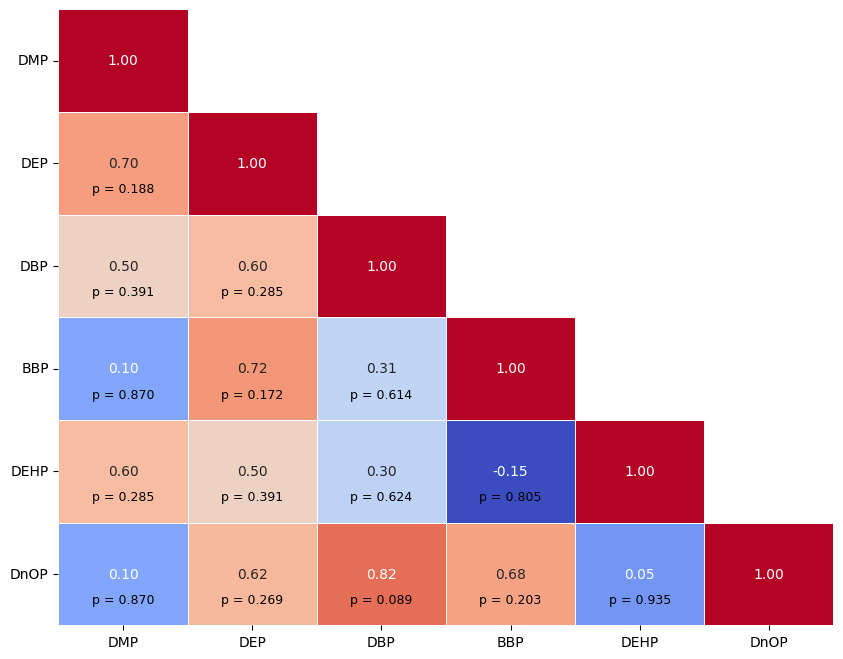

In [104]:
correlation_df_gp = correlation_df_gp.apply(pd.to_numeric, errors='coerce')

correlation_df_gp.index = ['DMP', 'DEP', 'DBP', 'BBP', 'DEHP', 'DnOP']
correlation_df_gp.columns = ['DMP', 'DEP', 'DBP', 'BBP', 'DEHP', 'DnOP']

p_value_df_gp.index = ['DMP', 'DEP', 'DBP', 'BBP', 'DEHP', 'DnOP']
p_value_df_gp.columns = ['DMP', 'DEP', 'DBP', 'BBP', 'DEHP', 'DnOP']

# Create a mask to hide the upper-right corner up to the diagonal
mask = np.triu(np.ones_like(correlation_df_gp, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df_gp, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", mask=mask, cbar=False)

# Add p-values to the heatmap (excluding diagonal and top-right part)
for i in range(len(compounds)):
    for j in range(len(compounds)):
        if i != j and not mask[i, j]:
            p_value = p_value_df_gp.iloc[i, j]
            plt.text(j + 0.5, i + 0.75, f"p = {p_value:.3f}", ha='center', va='center', fontsize=9, color='black')

significant_mask = correlation_df_pm < 0.05
# Add borders to significant correlations
for i in range(len(compounds)):
    for j in range(len(compounds)):
        if significant_mask.iloc[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=2))

plt.yticks(rotation=0)
plt.savefig('/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_pvalue_gp.png', dpi=300, bbox_inches='tight')
plt.show()

In [105]:
dfs = [Auto_1_pm_df, Auto_2_pm_df, Auto_3_pm_df, Auto_4_pm_df, Auto_5_pm_df]
compounds = Auto_5_gp_df['Phthalat:'].tolist()
correlation_df_pm = pd.DataFrame(index=compounds, columns=compounds)
p_value_df_pm = pd.DataFrame(index=compounds, columns=compounds)

# Calculate Spearman's rank correlation coefficients and p-values
for pair in combinations(compounds, 2):
    compound1, compound2 = pair

    concentrations1 = [df[df['Phthalat:'] == compound1]['Concentration [ng/m^3]'].values[0] for df in dfs]
    concentrations2 = [df[df['Phthalat:'] == compound2]['Concentration [ng/m^3]'].values[0] for df in dfs]

    correlation_coefficient, p_value = spearmanr(concentrations1, concentrations2)

    # Fill the correlation matrix
    correlation_df_pm.loc[compound1, compound2] = correlation_coefficient
    correlation_df_pm.loc[compound2, compound1] = correlation_coefficient

    # Fill the p-value matrix
    p_value_df_pm.loc[compound1, compound2] = p_value
    p_value_df_pm.loc[compound2, compound1] = p_value

# Fill diagonal with 1, each compound is perfectly correlated with itself
correlation_df_pm.values[[range(6)], [range(6)]] = 1
p_value_df_pm.values[[range(6)], [range(6)]] = 0  # P-value for self-correlation is 0

# Save dataframes to CSV
correlation_df_pm.to_csv('/content/drive/My Drive/Spearmanc_particlephase_correlation.csv')
print(correlation_df_pm)
p_value_df_pm.to_csv('/content/drive/My Drive/Spearmanc_particlephase_p_values.csv')
print(p_value_df_pm)

                            Dimethylphthalate Diethylphthalate  \
Dimethylphthalate                           1              0.9   
Diethylphthalate                          0.9                1   
Dibutylphthalate                          0.3              0.4   
Benzylbutylphthalate                      0.5              0.8   
Bis(2-ethyl-hexyl)phthalate               0.6              0.7   
Di-n-octylphthalate                       0.6              0.8   

                            Dibutylphthalate Benzylbutylphthalate  \
Dimethylphthalate                        0.3                  0.5   
Diethylphthalate                         0.4                  0.8   
Dibutylphthalate                           1                  0.6   
Benzylbutylphthalate                     0.6                    1   
Bis(2-ethyl-hexyl)phthalate              0.9                  0.7   
Di-n-octylphthalate                      0.5                  0.7   

                            Bis(2-ethyl-hexyl)phthala

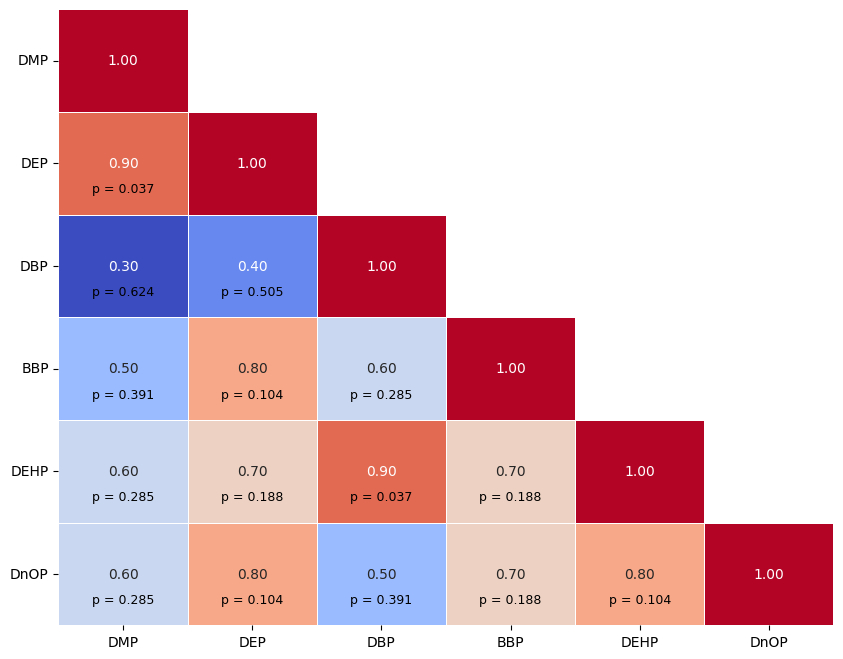

In [106]:
correlation_df_pm = correlation_df_pm.apply(pd.to_numeric, errors='coerce')

correlation_df_pm.index = ['DMP', 'DEP', 'DBP', 'BBP', 'DEHP', 'DnOP']
correlation_df_pm.columns = ['DMP', 'DEP', 'DBP', 'BBP', 'DEHP', 'DnOP']

p_value_df_pm.index = ['DMP', 'DEP', 'DBP', 'BBP', 'DEHP', 'DnOP']
p_value_df_pm.columns = ['DMP', 'DEP', 'DBP', 'BBP', 'DEHP', 'DnOP']

# Create a mask to hide the upper-right corner up to the diagonal
mask = np.triu(np.ones_like(correlation_df_pm, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_df_pm, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", mask=mask, cbar=False)

# Add p-values to the heatmap (excluding diagonal and top-right part)
for i in range(len(compounds)):
    for j in range(len(compounds)):
        if i != j and not mask[i, j]:
            p_value = p_value_df_pm.iloc[i, j]
            plt.text(j + 0.5, i + 0.75, f"p = {p_value:.3f}", ha='center', va='center', fontsize=9, color='black')

significant_mask = correlation_df_pm < 0.05

# Add borders to significant correlations using the same mask
for i in range(len(compounds)):
    for j in range(len(compounds)):
        if significant_mask.iloc[i, j]:
            heatmap.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=3))  # Adjust the color and linewidth

plt.yticks(rotation=0)
plt.savefig('/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_pvalue_pm.png', dpi=300, bbox_inches='tight')
plt.show()

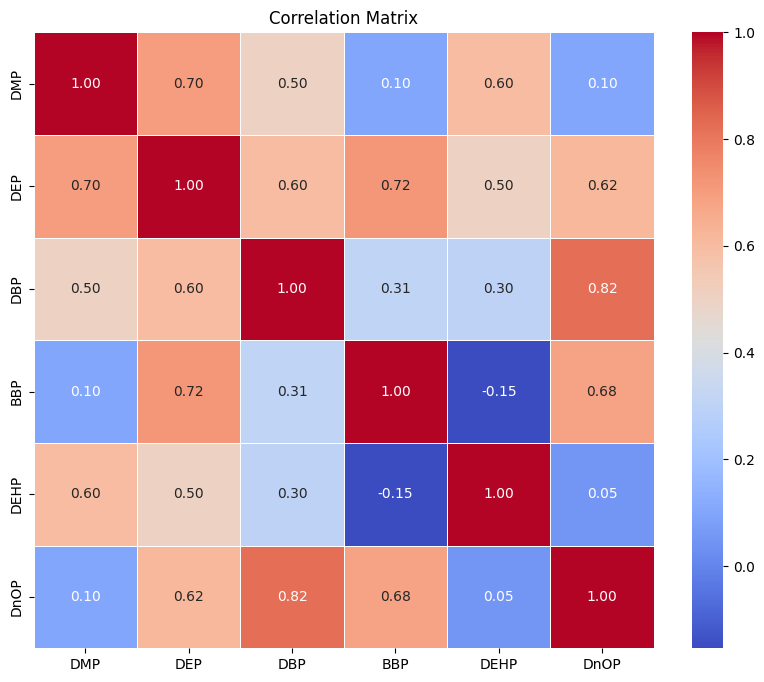

In [107]:
correlation_df_gp = correlation_df_gp.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df_gp, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_gp.png', dpi=300, bbox_inches='tight')
plt.show()

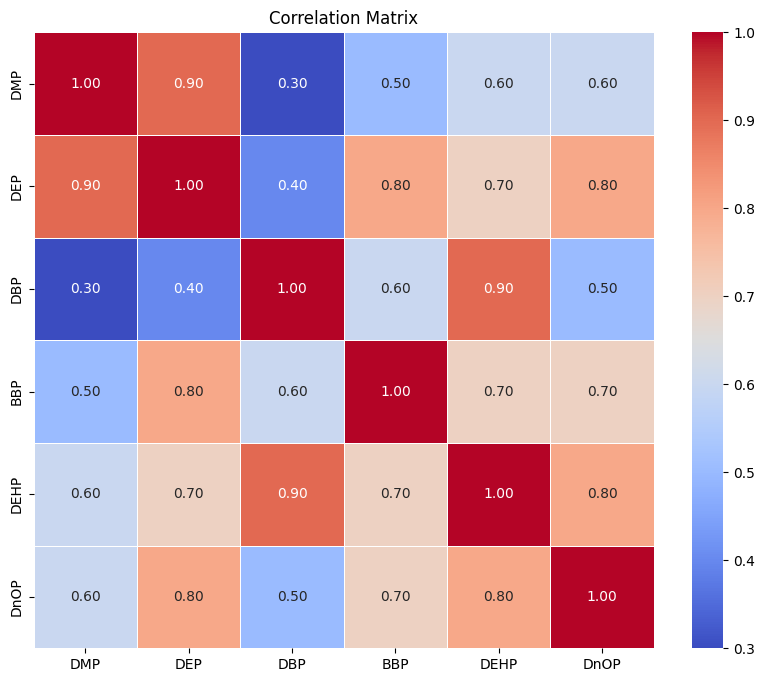

In [108]:
correlation_df_pm = correlation_df_pm.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df_pm, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_pm.png', dpi=300, bbox_inches='tight')
plt.show()

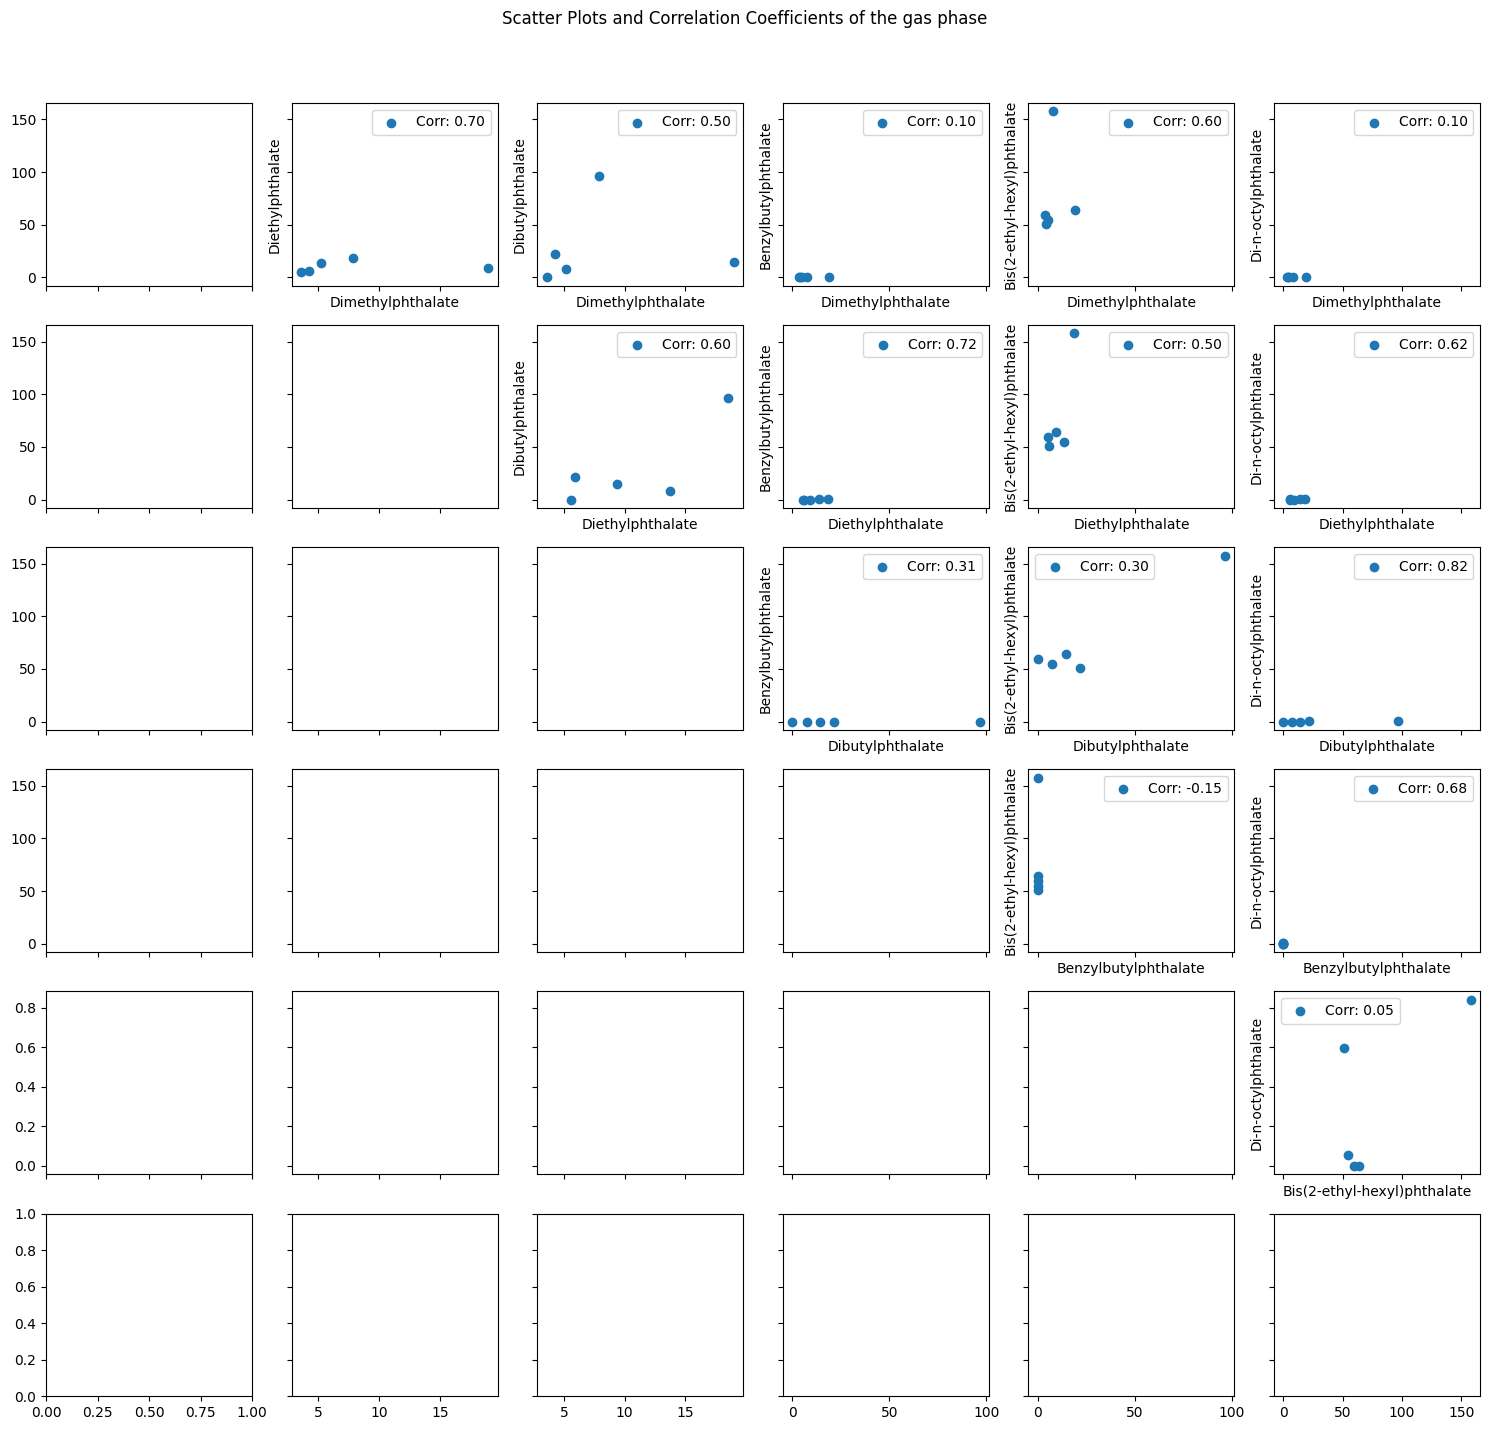

In [109]:
dfs = [Auto_1_gp_df, Auto_2_gp_df, Auto_3_gp_df, Auto_4_gp_df, Auto_5_gp_df]
compounds = Auto_5_gp_df['Phthalat:'].tolist()
correlation_df = pd.DataFrame(index=compounds, columns=compounds)

fig, axes = plt.subplots(6, 6, figsize=(15, 15), sharex='col', sharey='row')

#Calculate Spearman's rank correlation coefficients and plot scatter plots
for i, compound1 in enumerate(compounds):
    for j, compound2 in enumerate(compounds):
        if i >= j:  #Skip redundant combinations
            continue

        concentrations1 = [df[df['Phthalat:'] == compound1]['Concentration [ng/m^3]'].values[0] for df in dfs]
        concentrations2 = [df[df['Phthalat:'] == compound2]['Concentration [ng/m^3]'].values[0] for df in dfs]

        correlation_coefficient, _ = spearmanr(concentrations1, concentrations2)

        #Fill the correlation matrix
        correlation_df.loc[compound1, compound2] = correlation_coefficient
        correlation_df.loc[compound2, compound1] = correlation_coefficient

        axes[i, j].scatter(concentrations1, concentrations2, label=f'Corr: {correlation_coefficient:.2f}')
        axes[i, j].set_xlabel(compound1)
        axes[i, j].set_ylabel(compound2)
        axes[i, j].legend()

#Fill diagonal with 1, each compound is perfectly correlated with itself
correlation_df.values[[range(6)], [range(6)]] = 1

fig.suptitle('Scatter Plots and Correlation Coefficients of the gas phase')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_complete_gp.png', dpi=300, bbox_inches='tight')
plt.show()

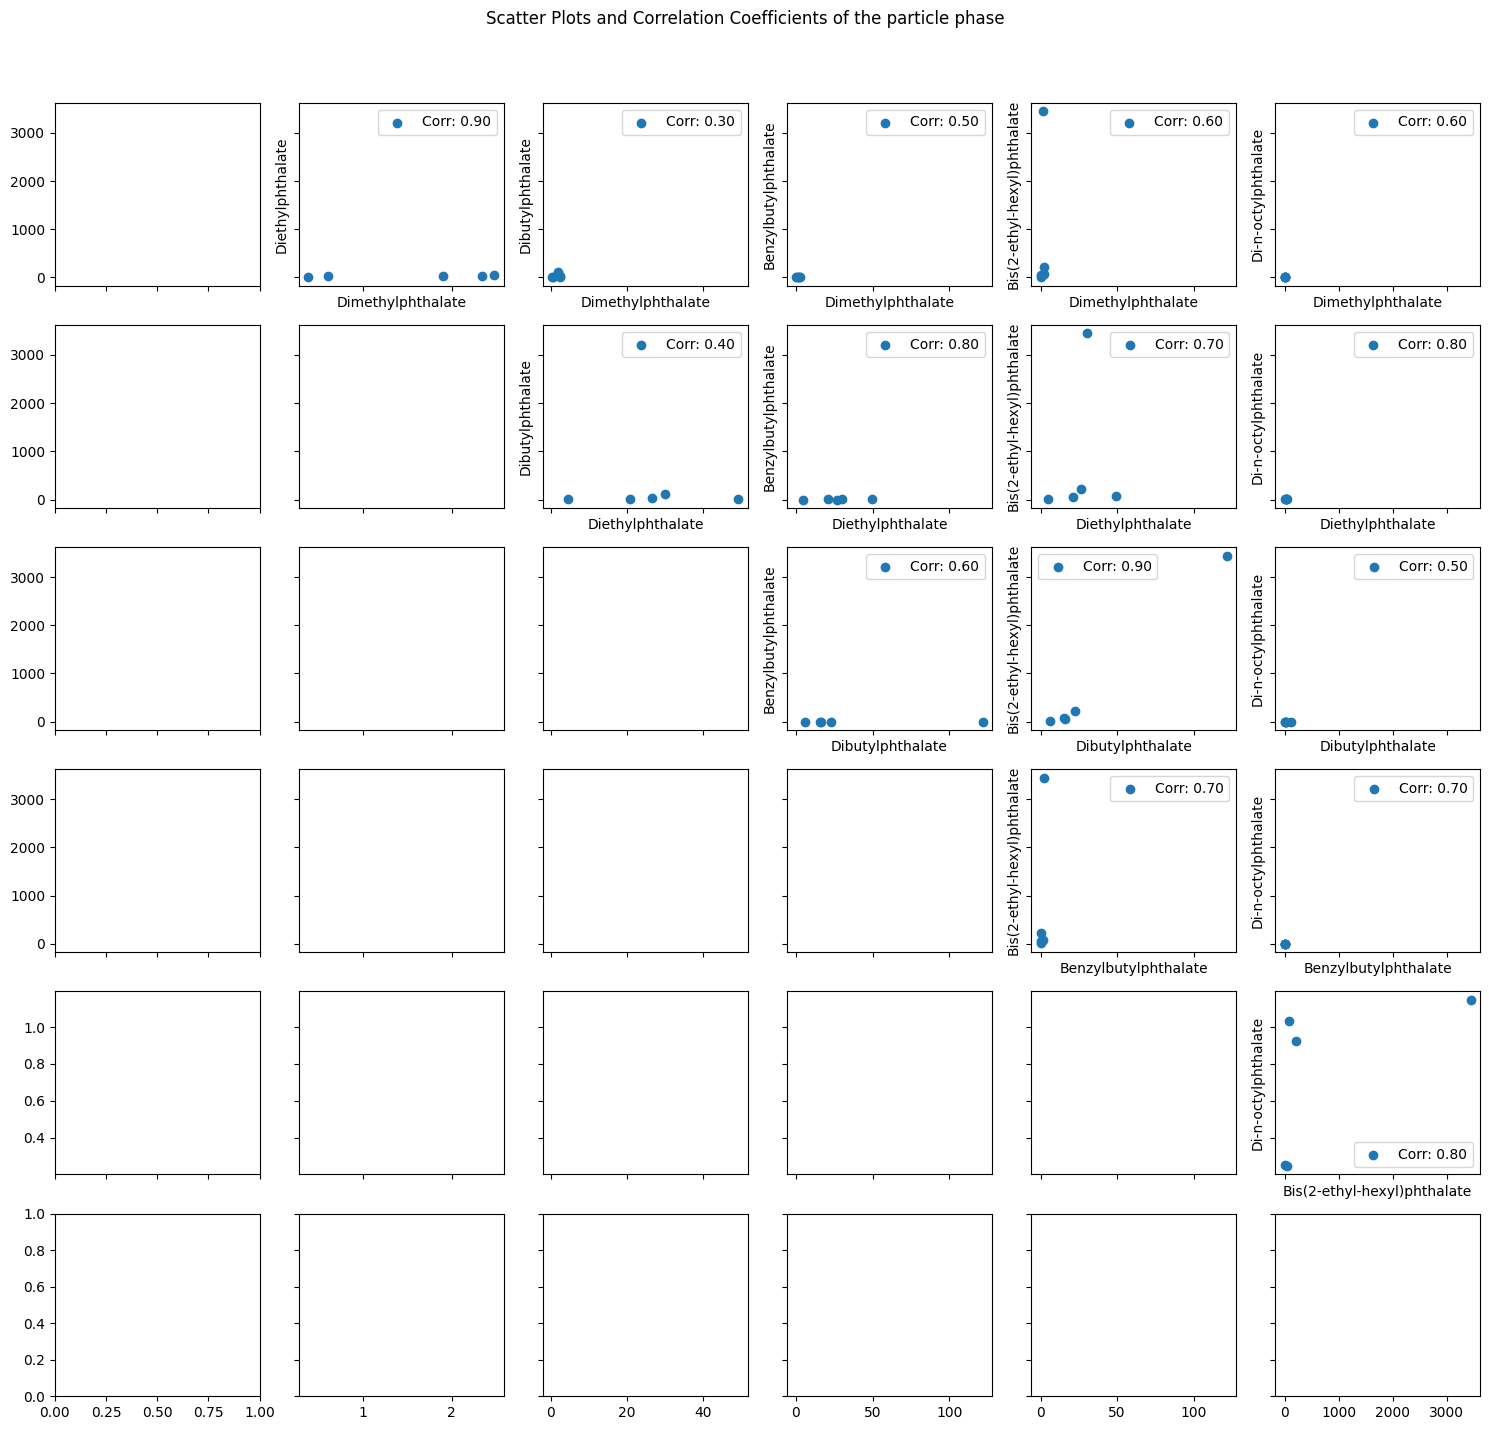

In [110]:
dfs = [Auto_1_pm_df, Auto_2_pm_df, Auto_3_pm_df, Auto_4_pm_df, Auto_5_pm_df]
compounds = Auto_5_gp_df['Phthalat:'].tolist()
correlation_df = pd.DataFrame(index=compounds, columns=compounds)

fig, axes = plt.subplots(6, 6, figsize=(15, 15), sharex='col', sharey='row')

#Calculate Spearman's rank correlation coefficients and plot scatter plots
for i, compound1 in enumerate(compounds):
    for j, compound2 in enumerate(compounds):
        if i >= j:  #Skip redundant combinations
            continue

        concentrations1 = [df[df['Phthalat:'] == compound1]['Concentration [ng/m^3]'].values[0] for df in dfs]
        concentrations2 = [df[df['Phthalat:'] == compound2]['Concentration [ng/m^3]'].values[0] for df in dfs]

        correlation_coefficient, _ = spearmanr(concentrations1, concentrations2)

        #Fill the correlation matrix
        correlation_df.loc[compound1, compound2] = correlation_coefficient
        correlation_df.loc[compound2, compound1] = correlation_coefficient

        axes[i, j].scatter(concentrations1, concentrations2, label=f'Corr: {correlation_coefficient:.2f}')
        axes[i, j].set_xlabel(compound1)
        axes[i, j].set_ylabel(compound2)
        axes[i, j].legend()

#Fill diagonal with 1, each compound is perfectly correlated with itself
correlation_df.values[[range(6)], [range(6)]] = 1

fig.suptitle('Scatter Plots and Correlation Coefficients of the particle phase')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_complete_pm.png', dpi=300, bbox_inches='tight')
plt.show()

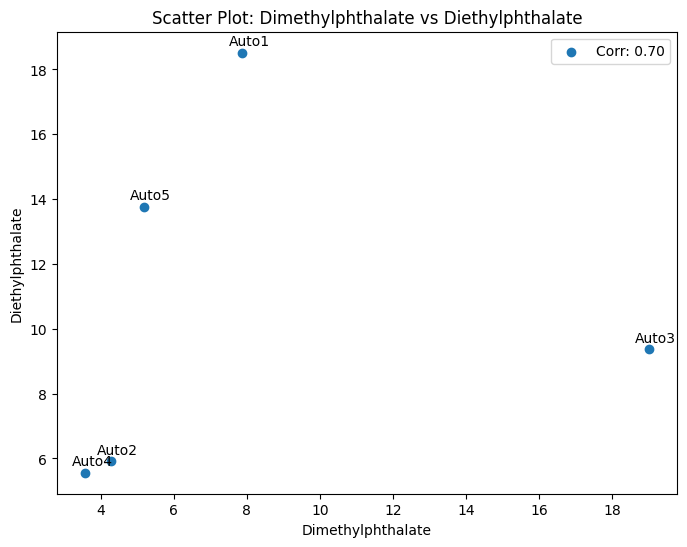

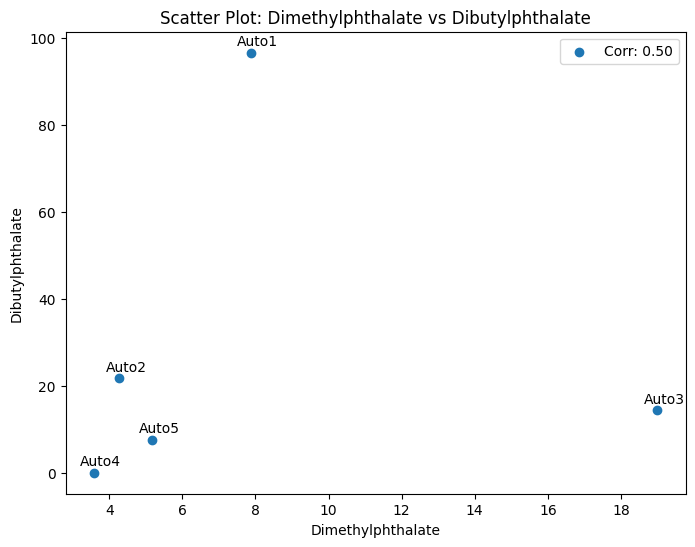

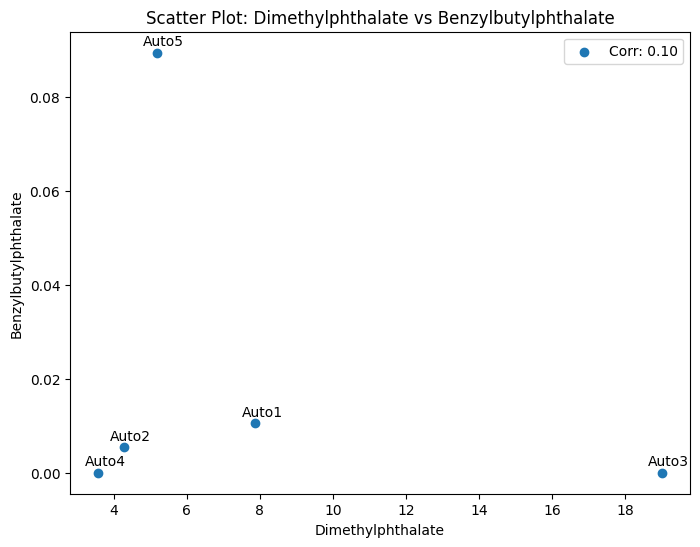

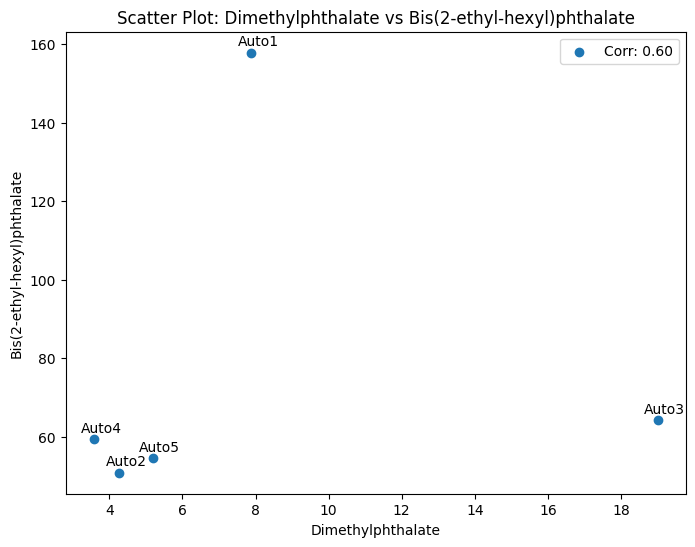

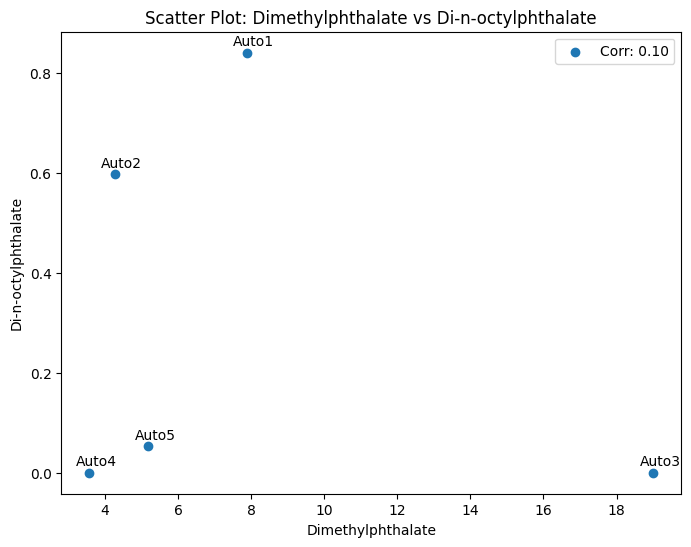

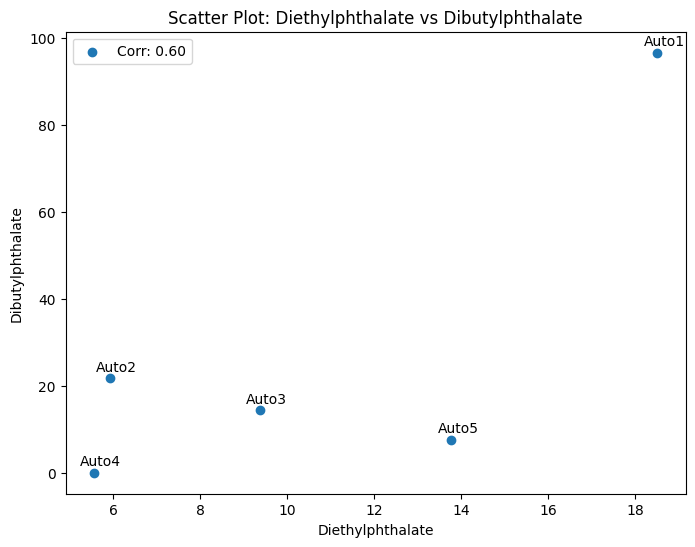

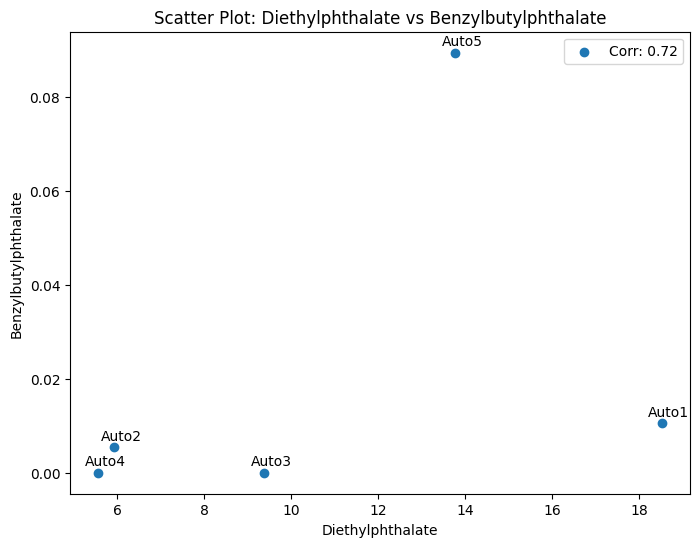

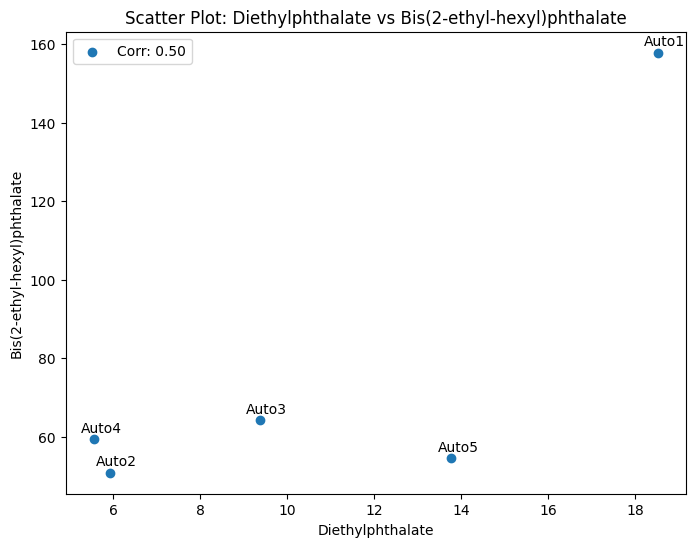

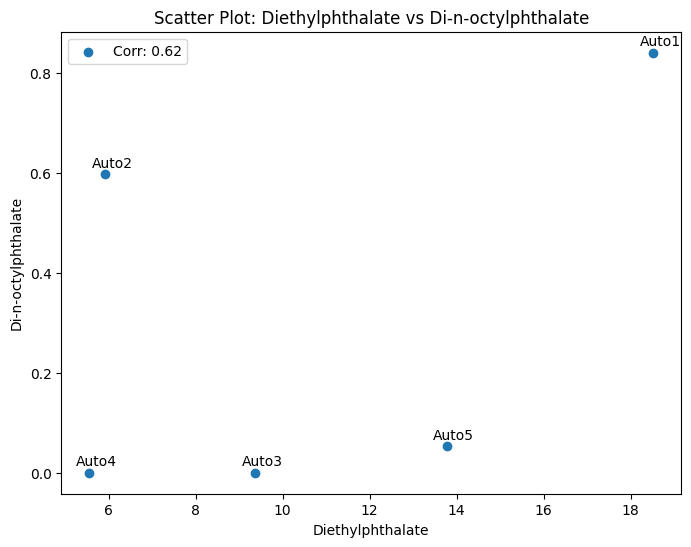

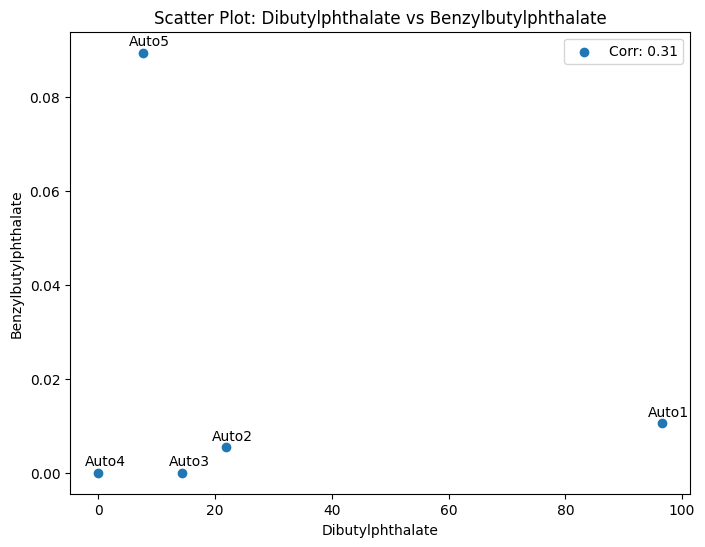

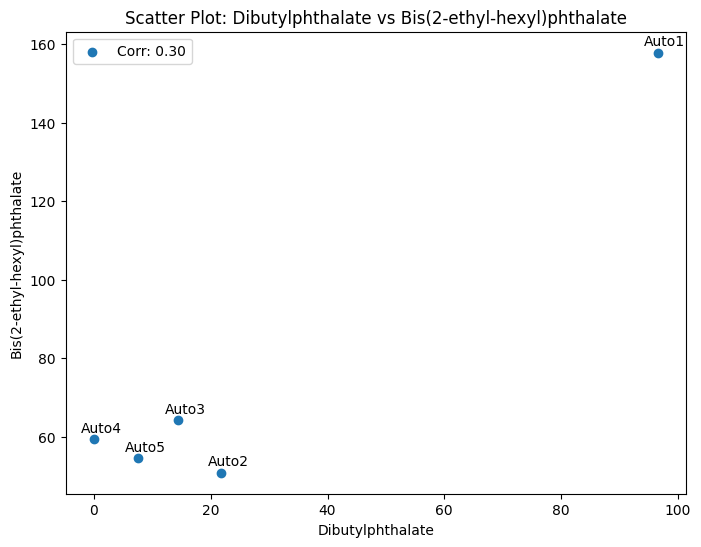

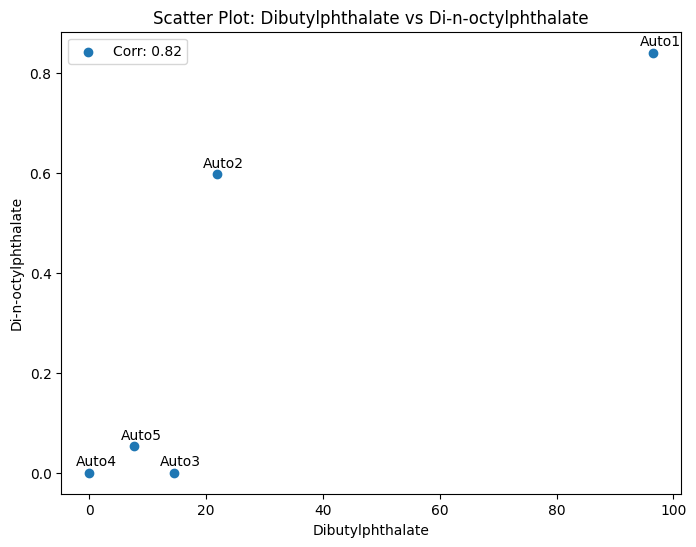

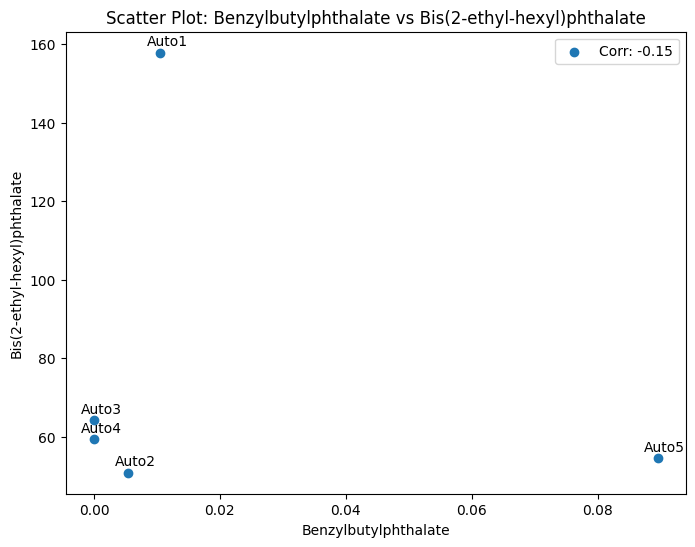

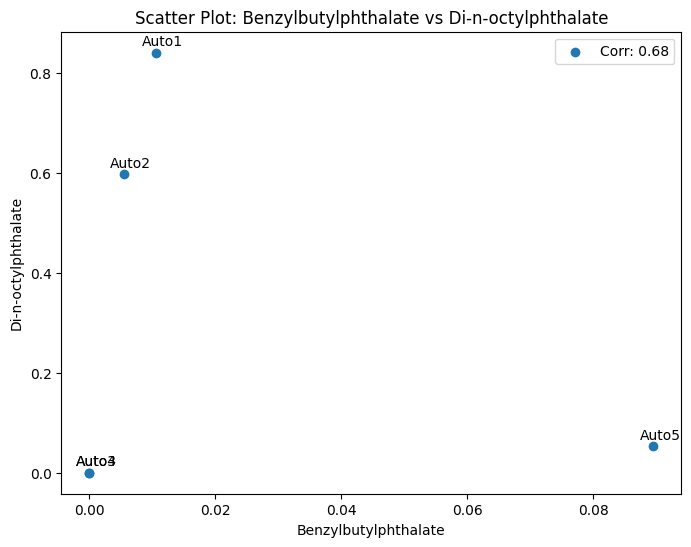

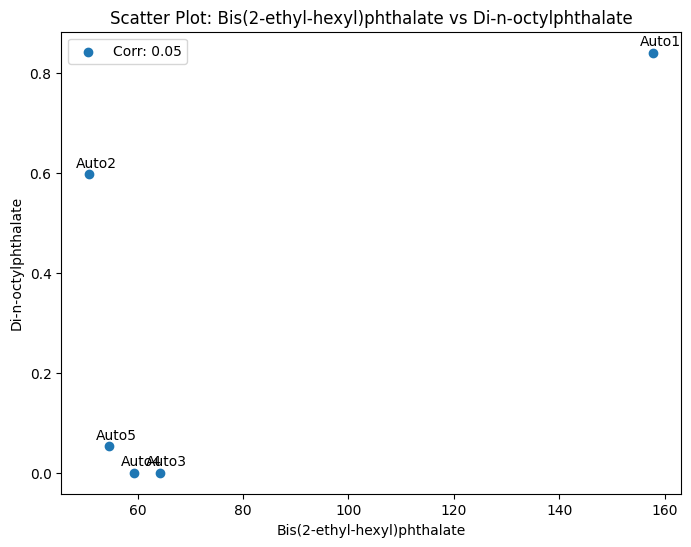

In [111]:
dfs = [Auto_1_gp_df, Auto_2_gp_df, Auto_3_gp_df, Auto_4_gp_df, Auto_5_gp_df]
compounds = Auto_5_gp_df['Phthalat:'].tolist()
correlation_df = pd.DataFrame(index=compounds, columns=compounds)

#Calculate Spearman's rank correlation coefficients and plot scatter plots
for i, compound1 in enumerate(compounds):
    for j, compound2 in enumerate(compounds):
        if i >= j:  #Skip redundant combinations
            continue

        concentrations1 = [df[df['Phthalat:'] == compound1]['Concentration [ng/m^3]'].values[0] for df in dfs]
        concentrations2 = [df[df['Phthalat:'] == compound2]['Concentration [ng/m^3]'].values[0] for df in dfs]

        correlation_coefficient, _ = spearmanr(concentrations1, concentrations2)

        #Fill the correlation matrix
        correlation_df.loc[compound1, compound2] = correlation_coefficient
        correlation_df.loc[compound2, compound1] = correlation_coefficient

        #Create a new figure for each scatter plot
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(concentrations1, concentrations2, label=f'Corr: {correlation_coefficient:.2f}')

        for k, (x, y) in enumerate(zip(concentrations1, concentrations2)):
            ax.annotate(f'Auto{k+1}', (x, y), textcoords="offset points", xytext=(5, 5), ha='center')

        ax.set_xlabel(compound1)
        ax.set_ylabel(compound2)
        ax.legend()
        ax.set_title(f'Scatter Plot: {compound1} vs {compound2}')
        plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_sp_gp_{compound1}_{compound2}.png', dpi=300, bbox_inches='tight')
        plt.show()

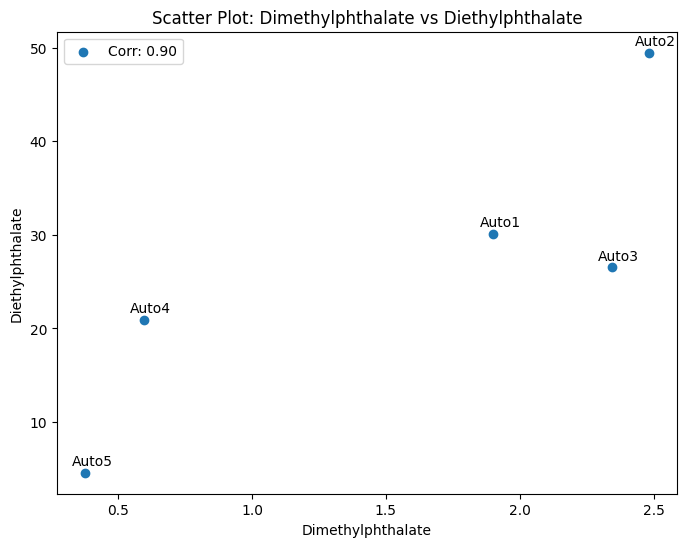

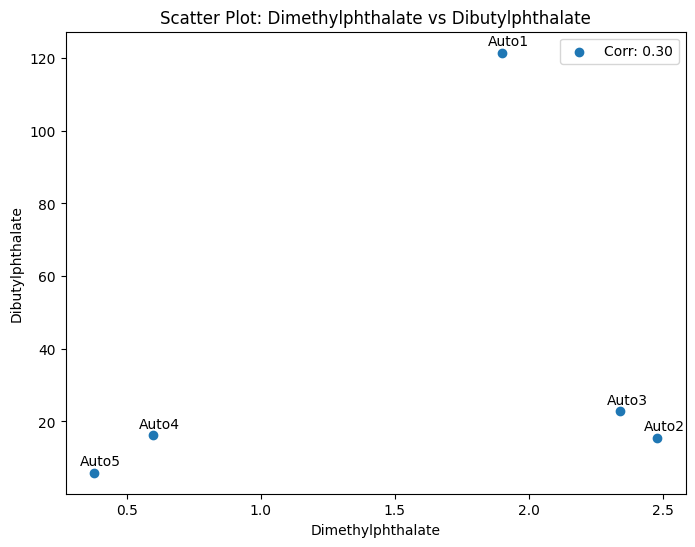

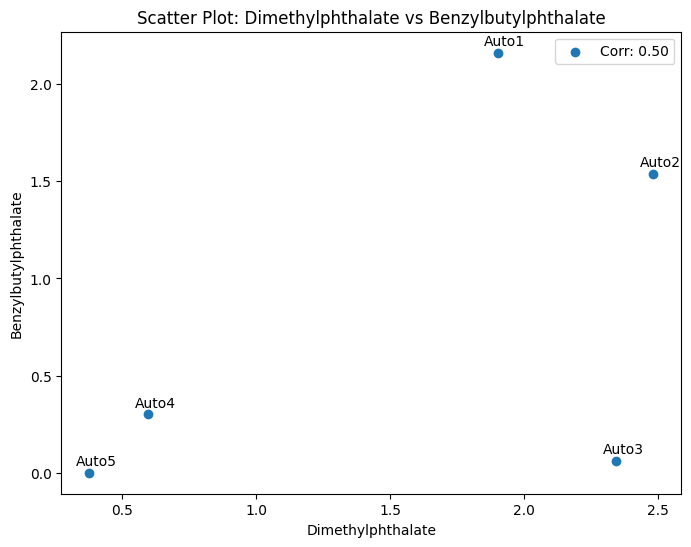

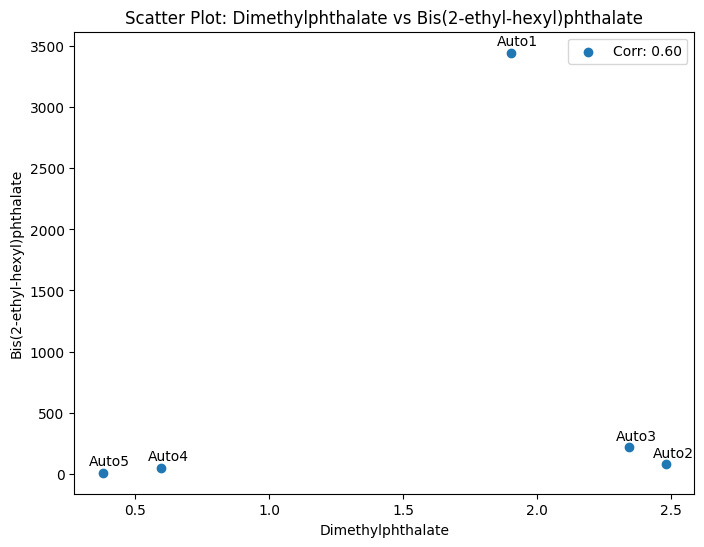

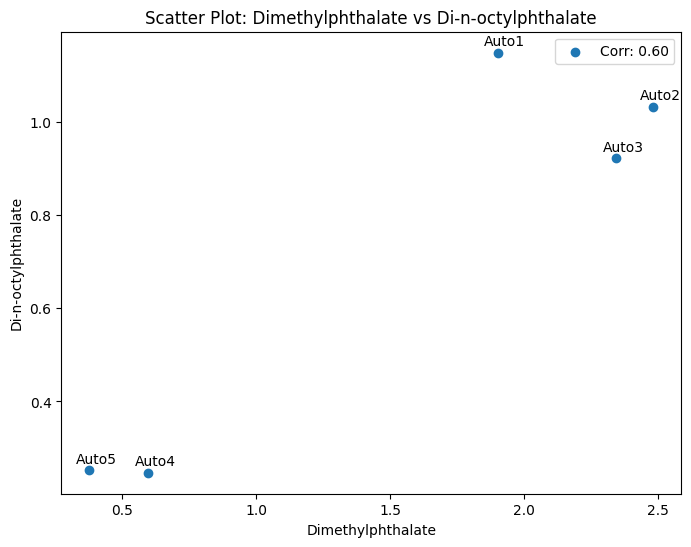

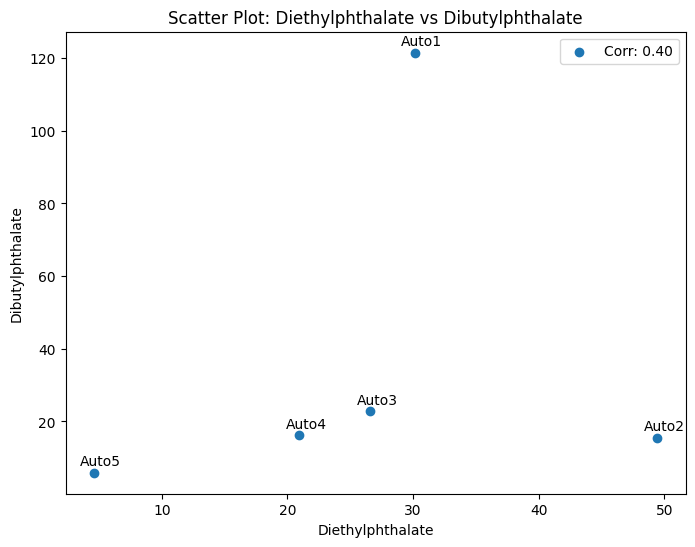

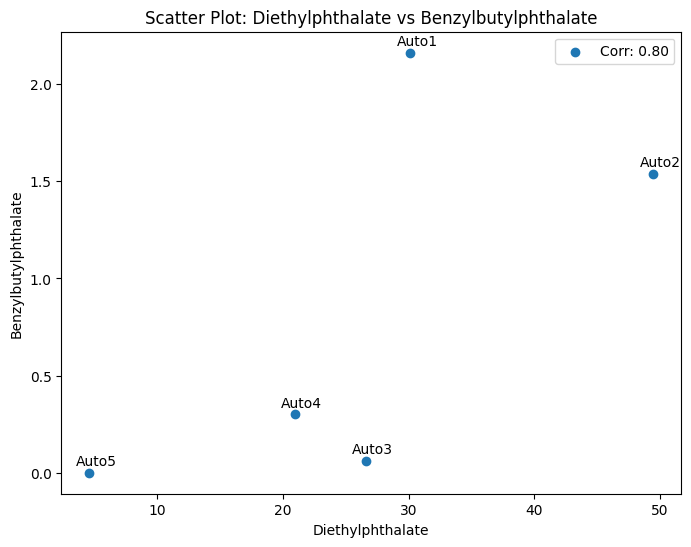

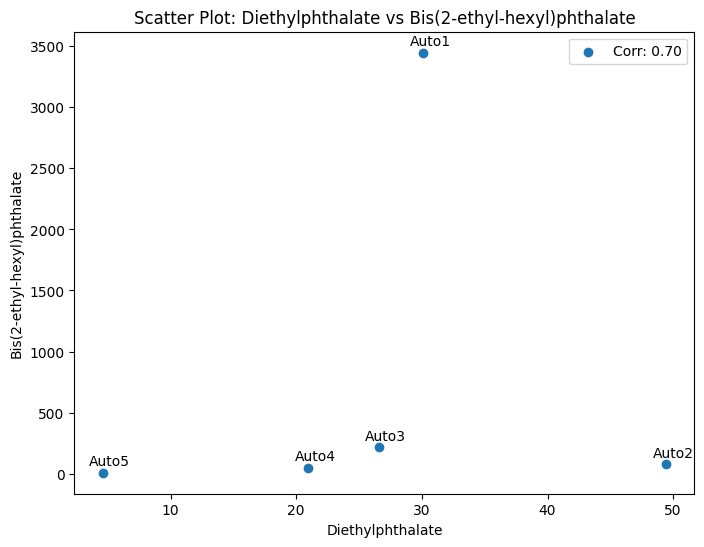

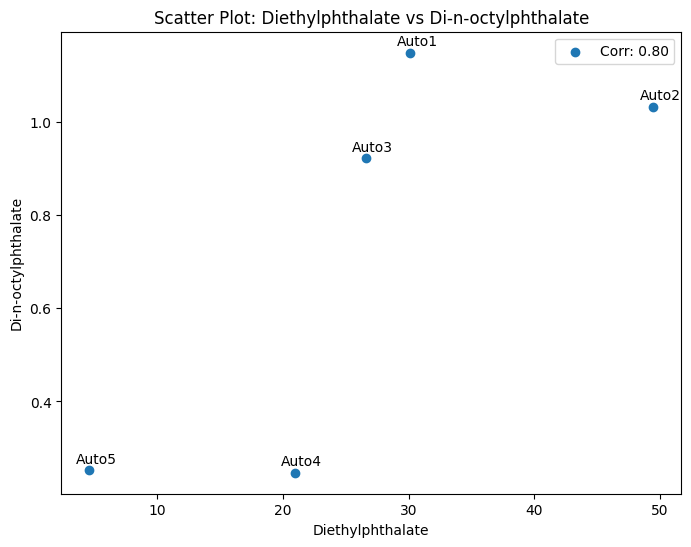

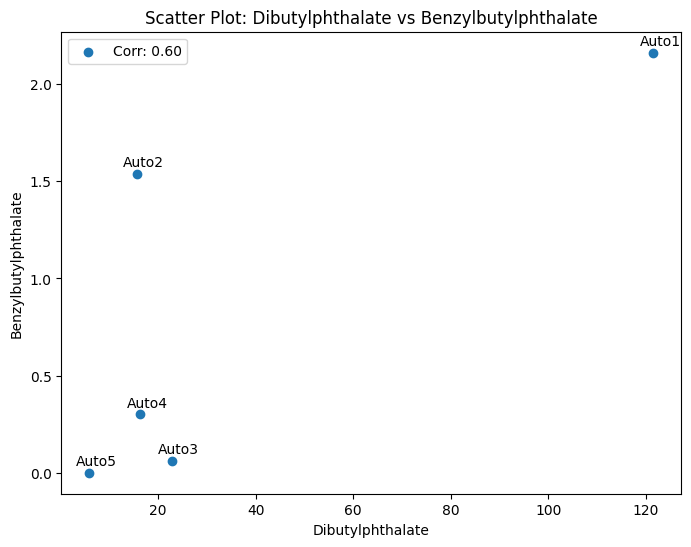

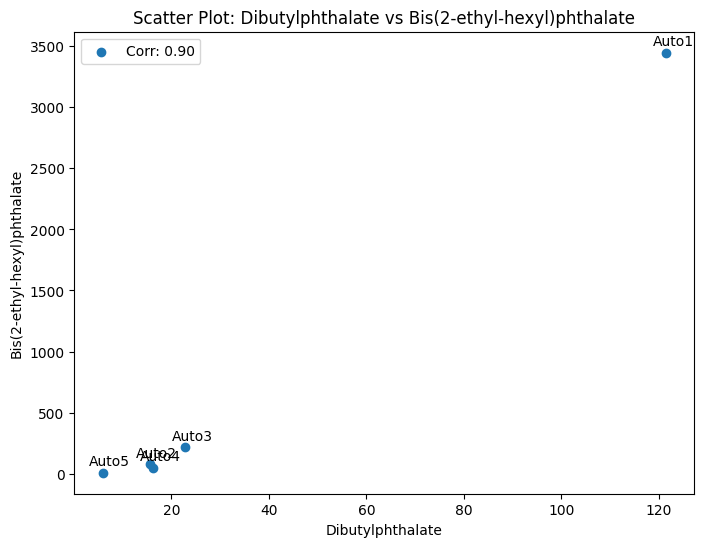

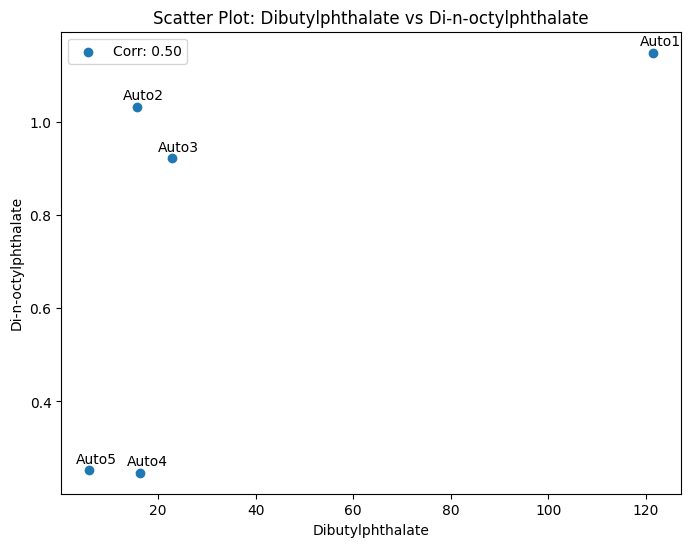

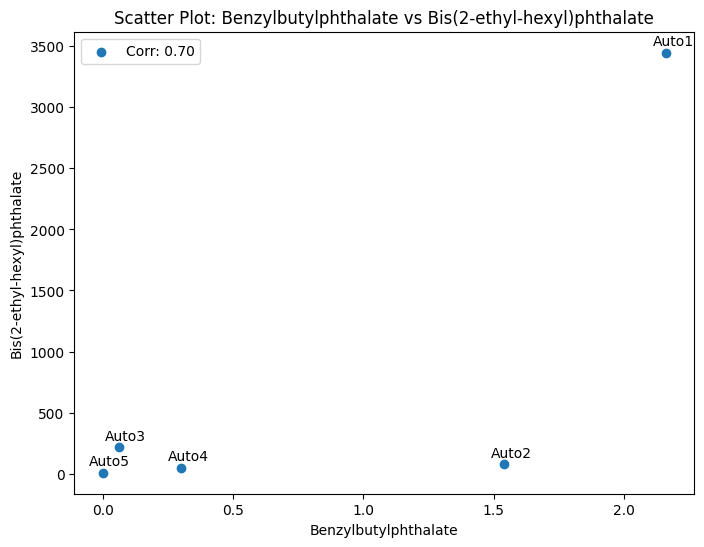

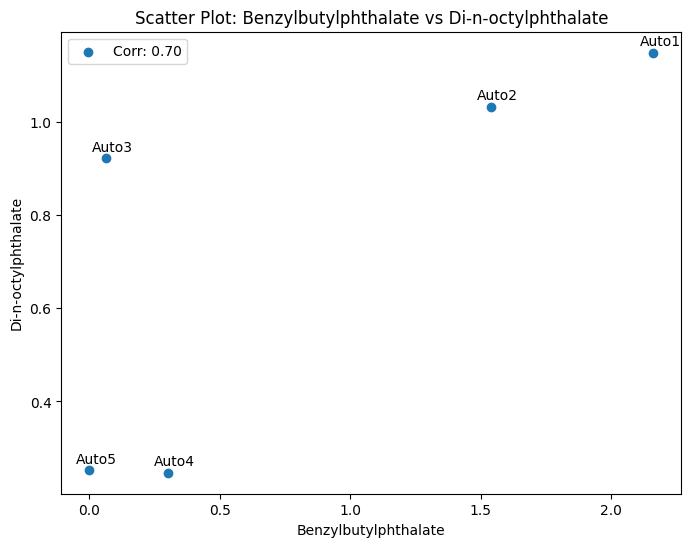

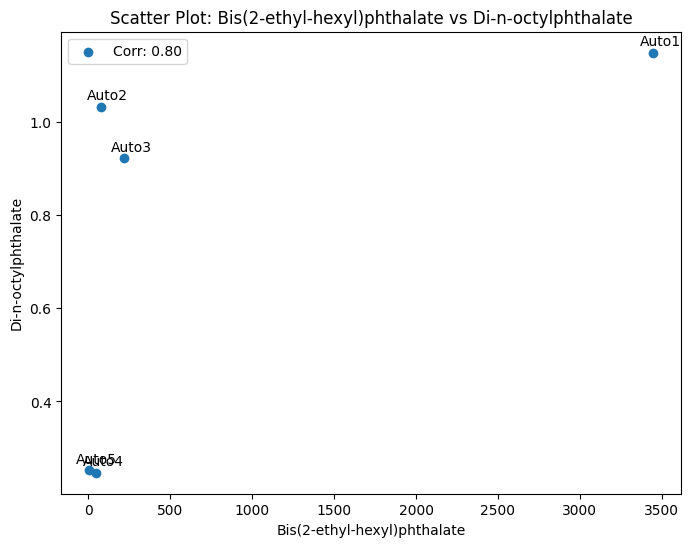

In [112]:
dfs = [Auto_1_pm_df, Auto_2_pm_df, Auto_3_pm_df, Auto_4_pm_df, Auto_5_pm_df]
compounds = Auto_5_gp_df['Phthalat:'].tolist()
correlation_df = pd.DataFrame(index=compounds, columns=compounds)

for i, compound1 in enumerate(compounds):
    for j, compound2 in enumerate(compounds):
        if i >= j:  # Skip redundant combinations
            continue

        concentrations1 = [df[df['Phthalat:'] == compound1]['Concentration [ng/m^3]'].values[0] for df in dfs]
        concentrations2 = [df[df['Phthalat:'] == compound2]['Concentration [ng/m^3]'].values[0] for df in dfs]

        correlation_coefficient, _ = spearmanr(concentrations1, concentrations2)

        #Fill the correlation matrix
        correlation_df.loc[compound1, compound2] = correlation_coefficient
        correlation_df.loc[compound2, compound1] = correlation_coefficient

        #Create a new figure for each scatter plot
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(concentrations1, concentrations2, label=f'Corr: {correlation_coefficient:.2f}')

        for k, (x, y) in enumerate(zip(concentrations1, concentrations2)):
            ax.annotate(f'Auto{k+1}', (x, y), textcoords="offset points", xytext=(5, 5), ha='center')

        ax.set_xlabel(compound1)
        ax.set_ylabel(compound2)
        ax.legend()
        ax.set_title(f'Scatter Plot: {compound1} vs {compound2}')
        plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_sp_pm_{compound1}_{compound2}.png', dpi=300, bbox_inches='tight')
        plt.show()

In [113]:
dfs_gp = [Auto_1_gp_df, Auto_2_gp_df, Auto_3_gp_df, Auto_4_gp_df, Auto_5_gp_df]
dfs_pm = [Auto_1_pm_df, Auto_2_pm_df, Auto_3_pm_df, Auto_4_pm_df, Auto_5_pm_df]
compounds = Auto_5_gp_df['Phthalat:'].tolist()

correlation_df_gp_pm = pd.DataFrame(index=compounds, columns=compounds)
p_value_df_gp_pm = pd.DataFrame(index=compounds, columns=compounds)

# Calculate Spearman's rank correlation coefficients and p-values between gas phase and particle phase
for compound1, compound2 in product(compounds, repeat=2):
    # Combine concentrations for each compound from gas phase DataFrames
    concentrations_gp = [df[df['Phthalat:'] == compound1]['Concentration [ng/m^3]'].values[0] for df in dfs_gp]
    # Combine concentrations for each compound from particle phase DataFrames
    concentrations_pm = [df[df['Phthalat:'] == compound2]['Concentration [ng/m^3]'].values[0] for df in dfs_pm]

    correlation_coefficient, p_value = spearmanr(concentrations_gp, concentrations_pm)

    # Fill the correlation matrix
    correlation_df_gp_pm.loc[compound1, compound2] = correlation_coefficient
    p_value_df_gp_pm.loc[compound1, compound2] = p_value

correlation_df_gp_pm.to_csv('/content/drive/My Drive/Spearmanc_gp_pm.csv')
p_value_df_gp_pm.to_csv('/content/drive/My Drive/Spearmanc_gp_pm_p_values.csv')
print(correlation_df_gp_pm)
print(p_value_df_gp_pm)

                            Dimethylphthalate Diethylphthalate  \
Dimethylphthalate                         0.2              0.1   
Diethylphthalate                         -0.2              0.0   
Dibutylphthalate                          0.6              0.8   
Benzylbutylphthalate                -0.410391        -0.153897   
Bis(2-ethyl-hexyl)phthalate              -0.1              0.0   
Di-n-octylphthalate                  0.205196         0.564288   

                            Dibutylphthalate Benzylbutylphthalate  \
Dimethylphthalate                        0.5                 -0.1   
Diethylphthalate                         0.3                  0.1   
Dibutylphthalate                         0.5                  0.7   
Benzylbutylphthalate               -0.359092            -0.051299   
Bis(2-ethyl-hexyl)phthalate              0.9                  0.3   
Di-n-octylphthalate                 0.153897             0.666886   

                            Bis(2-ethyl-hexyl)phthala

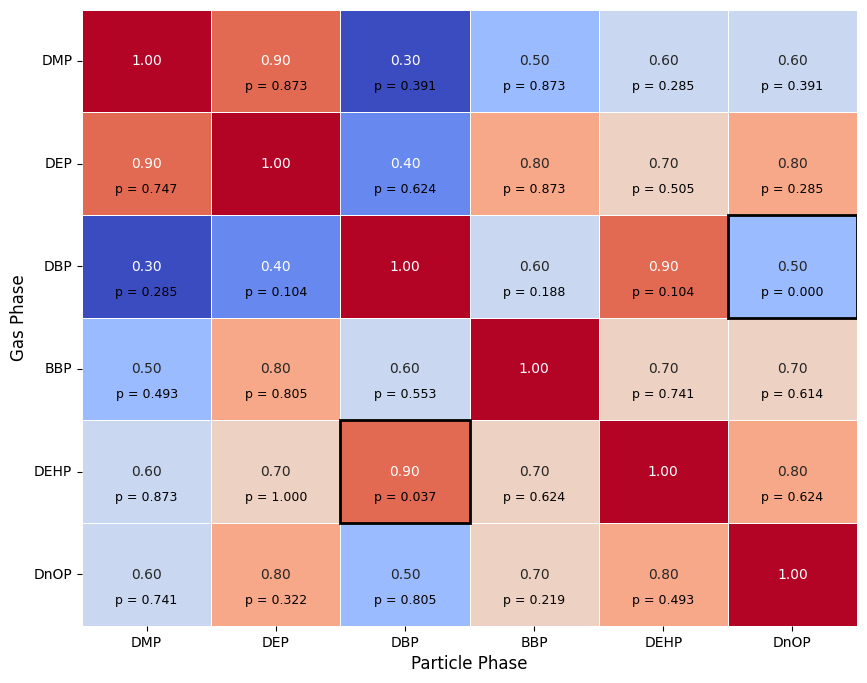

In [114]:
correlation_df_gp_pm = correlation_df_gp_pm.apply(pd.to_numeric, errors='coerce')

correlation_df_gp_pm.index = ['DMP', 'DEP', 'DBP', 'BBP', 'DEHP', 'DnOP']
correlation_df_gp_pm.columns = ['DMP', 'DEP', 'DBP', 'BBP', 'DEHP', 'DnOP']

p_value_df_gp_pm.index = ['DMP', 'DEP', 'DBP', 'BBP', 'DEHP', 'DnOP']
p_value_df_gp_pm.columns = ['DMP', 'DEP', 'DBP', 'BBP', 'DEHP', 'DnOP']

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df_pm, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", cbar=False)

# Add p-values to the heatmap (excluding diagonal and top-right part)
for i in range(len(compounds)):
    for j in range(len(compounds)):
        if i != j:
            p_value = p_value_df_gp_pm.iloc[i, j]
            plt.text(j + 0.5, i + 0.75, f"p = {p_value:.3f}", ha='center', va='center', fontsize=9, color='black')

significant_mask = p_value_df_gp_pm < 0.05

# Add borders to significant correlations
for i in range(len(compounds)):
    for j in range(len(compounds)):
        if significant_mask.iloc[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=2))


plt.xlabel('Particle Phase', fontsize=12)
plt.ylabel('Gas Phase', fontsize=12)
plt.yticks(rotation=0)
plt.savefig('/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_pvalue_gp_pm.png', dpi=300, bbox_inches='tight')
plt.show()

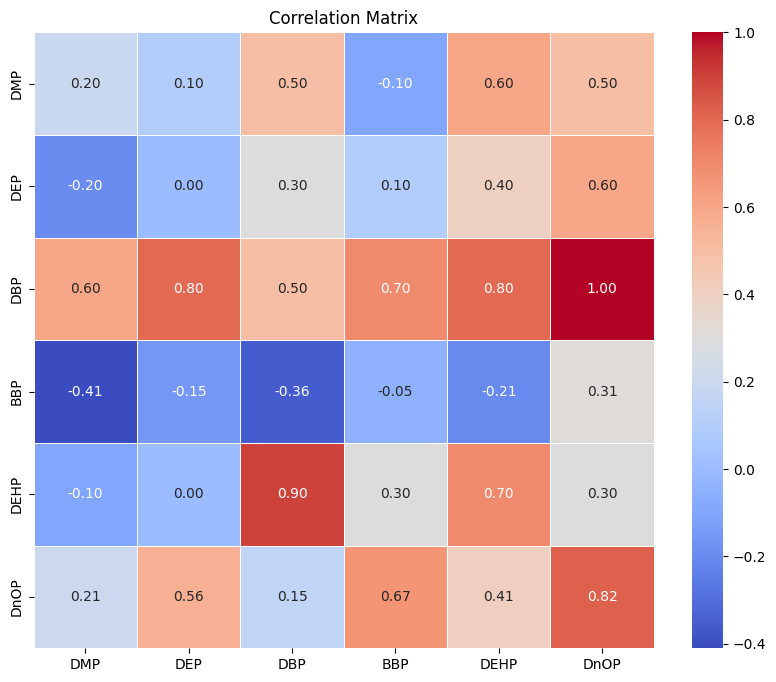

In [115]:
correlation_df_gp_pm = correlation_df_gp_pm.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df_gp_pm, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_gp_to_pm.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
dfs_gp = [Auto_1_gp_df, Auto_2_gp_df, Auto_3_gp_df, Auto_4_gp_df, Auto_5_gp_df]
dfs_pm = [Auto_1_pm_df, Auto_2_pm_df, Auto_3_pm_df, Auto_4_pm_df, Auto_5_pm_df]
compounds = Auto_5_gp_df['Phthalat:'].tolist()

correlation_df_gp_pm = pd.DataFrame(index=compounds, columns=compounds)

fig, axes = plt.subplots(6, 6, figsize=(18, 18), sharex='col', sharey='row')

for i, compound1 in enumerate(compounds):
    for j, compound2 in enumerate(compounds):

        # Combine concentrations for each compound from gas phase DataFrames
        concentrations_gp = [df[df['Phthalat:'] == compound1]['Concentration [ng/m^3]'].values[0] for df in dfs_gp]
        # Combine concentrations for each compound from particle phase DataFrames
        concentrations_pm = [df[df['Phthalat:'] == compound2]['Concentration [ng/m^3]'].values[0] for df in dfs_pm]

        correlation_coefficient, _ = spearmanr(concentrations_gp, concentrations_pm)

        # Fill the correlation matrix
        correlation_df_gp_pm.loc[compound1, compound2] = correlation_coefficient

        axes[i, j].scatter(concentrations_pm, concentrations_gp, label=f'Corr: {correlation_coefficient:.2f}')
        axes[i, j].set_xlabel(compound2 + ' (Particle Phase)')
        axes[i, j].set_ylabel(compound1 + ' (Gas Phase)')
        axes[i, j].legend()

fig.suptitle('Scatter Plots and Correlation Coefficients of the Gas Phase vs. Particle Phase')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_complete_gp_pm.png', dpi=300, bbox_inches='tight')
plt.show()